# Examples with Mean_Flux_Regulation

In [12]:
%matplotlib notebook

In [30]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u

from pyigm.fN import mockforest as pyimock
from pyigm.fN.fnmodel import FNModel
from pyigm.igm import mfr as py_mfr

## Build a Lya forest

In [9]:
fN_model = FNModel.default_model()

Using P14 spline values to generate a default model
Loading: /Users/xavier/local/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz


In [3]:
# Quasar
zem = 2.5
# Spectral
s2n = 10.
sampling = 2.
R = 2000.

In [17]:
# Resultant wavelength array (using constant dwv instead of constant dv)
disp = 4000/R/sampling # Angstrom
wave = np.arange(3600., 1300*(1+zem), disp)*u.AA

In [20]:
norm_spec, HI_comps, _ = pyimock.mk_mock(wave, zem, fN_model, s2n=s2n, fwhm=sampling, add_conti=False)

Using a Flat LCDM cosmology: h=0.7, Om=0.3


<IPython.core.display.Javascript object>


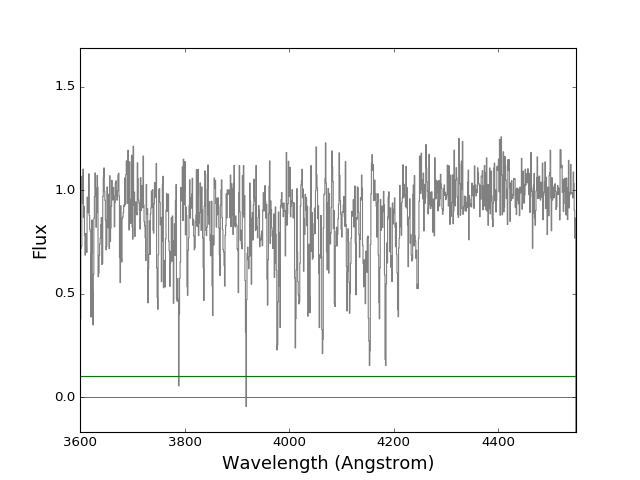

In [21]:
norm_spec.plot()

## Tilt it

<IPython.core.display.Javascript object>


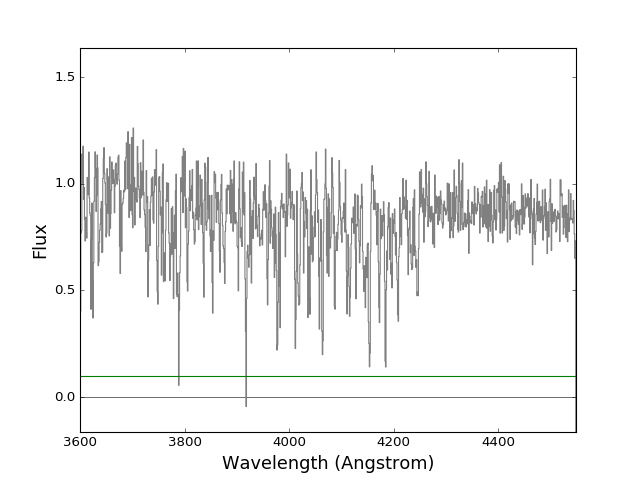

In [24]:
flambda = (norm_spec.wavelength.value/3850.)**(-1)
flux_spec = norm_spec.copy()
flux_spec.flux = norm_spec.flux * flambda
flux_spec.plot()

## Fit it

In [29]:
reload(py_mfr)
new_flux, parm = py_mfr.fit_forest(flux_spec.wavelength.value, flux_spec.flux.value, flux_spec.sig.value, zem)

### Plot

In [32]:
lambda_r = flux_spec.wavelength.value / (1+zem)
new_conti = py_mfr.mfluxcorr(lambda_r,parm.p0.value, parm.p1.value,lamb_piv=parm.lamb_piv.value)

<IPython.core.display.Javascript object>


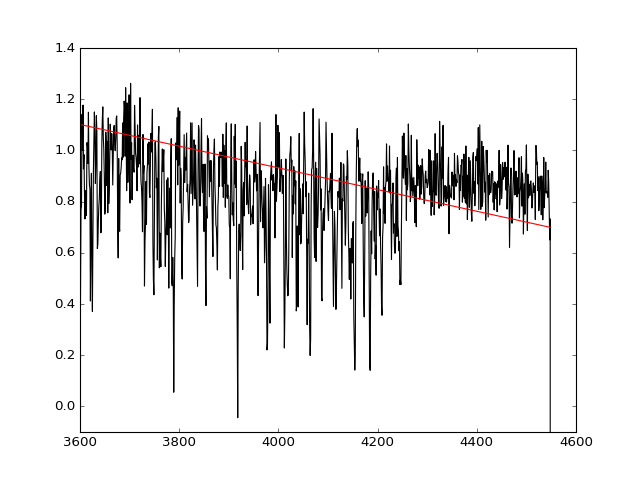

In [35]:
plt.clf()
ax = plt.gca()
ax.plot(flux_spec.wavelength, flux_spec.flux, 'k')
ax.plot(flux_spec.wavelength, new_conti, 'r')
ax.set_ylim(-0.1, 1.4)
plt.show()